# [TEMPLATE] DATASET DEPURADO

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
bins = 200
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [7]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [8]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

# ¿Existe alguna relación entre la latitud de la propiedad y el precio, quizás por cercanía a la frontera con Estados Unidos o por la temperatura?

## Todas las propiedades

In [4]:
df = df.loc[~(df['lat'].isnull()) & (df['lat'] > 0)]

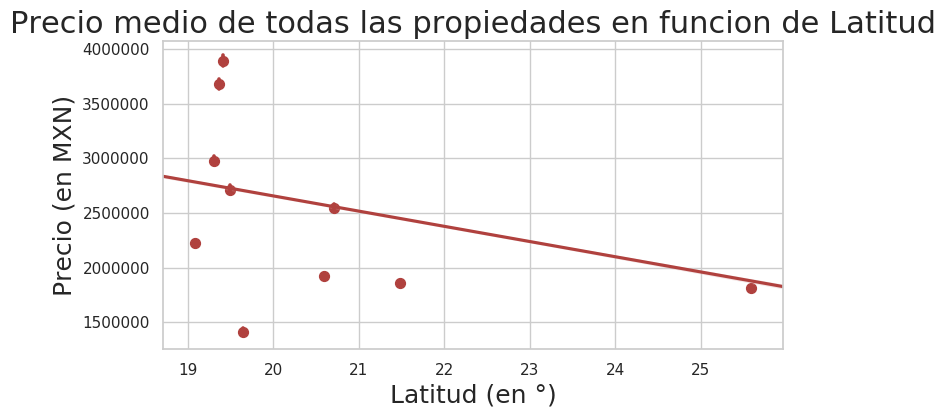

In [15]:
plt.figure(figsize=(8, 4))
g = sns.regplot(x="lat", y="precio", data=df, color='#B0413E',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de todas las propiedades en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(todas las propiedades).png", bbox_inches='tight')

## Casas

In [16]:
df = df.loc[df['tipodepropiedad']=='Casa']

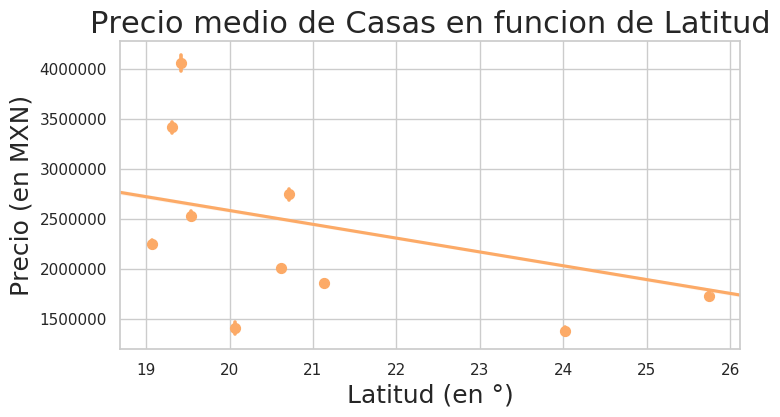

In [17]:
plt.figure(figsize=(8, 4))
g = sns.regplot(x="lat", y="precio", data=df, color='#FCAA67',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de Casas en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(casas).png", bbox_inches='tight')

## Apartamentos

In [ ]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

df = df.loc[~(df['lat'].isnull()) & (df['lat'] > 0)]

In [19]:
df = df.loc[df['tipodepropiedad']=='Apartamento']

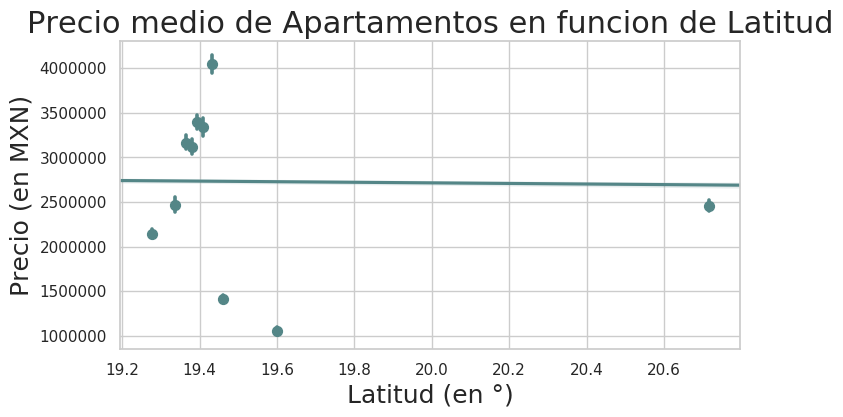

In [20]:
plt.figure(figsize=(8, 4))
g = sns.regplot(x="lat", y="precio", data=df, color='#548687',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de Apartamentos en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(apartamentos).png", bbox_inches='tight')